# CatBoost Model

## Get Latest Game Data

Import libraries:

In [1]:
import pandas as pd
import json
import requests

Get latest champion information:

In [2]:
versions = requests.get('https://ddragon.leagueoflegends.com/realms/na.json').json()

championData = requests.get(f"http://ddragon.leagueoflegends.com/cdn/{versions['n']['champion']}/data/en_US/champion.json").json()

champions = pd.DataFrame(columns = ['championId', 'name', 'attack', 'defense', 'magic', 'difficulty', 'primaryClass', 'secondaryClass', 'partype', 'hp', 'hpperlevel', 'mp', 'mpperlevel', 'movespeed', 'armor', 'armorperlevel', 'spellblock', 'spellblockperlevel', 'attackrange', 'hpregen', 'hpregenperlevel', 'mpregen', 'mpregenperlevel', 'crit', 'critperlevel', 'attackdamage', 'attackdamageperlevel', 'attackspeedperlevel', 'attackspeed'])

for k, v in championData['data'].items():
    champions = champions.append({'championId': int(v['key']),
                        'name': v['name'], 
                        'attack': v['info']['attack'], 
                        'defense': v['info']['defense'], 
                        'magic': v['info']['magic'], 
                        'difficulty': v['info']['difficulty'], 
                        'primaryClass': v['tags'][0], 
                        'secondaryClass': v['tags'][1] if len(v['tags']) > 1 else 'None', 
                        'partype': v['partype'], 
                        'hp': v['stats']['hp'], 
                        'hpperlevel': v['stats']['hpperlevel'], 
                        'mp': v['stats']['mp'], 
                        'mpperlevel': v['stats']['mpperlevel'], 
                        'movespeed': v['stats']['movespeed'], 
                        'armor': v['stats']['armor'], 
                        'armorperlevel': v['stats']['armorperlevel'], 
                        'spellblock': v['stats']['spellblock'], 
                        'spellblockperlevel': v['stats']['spellblockperlevel'], 
                        'attackrange': v['stats']['attackrange'], 
                        'hpregen': v['stats']['hpregen'], 
                        'hpregenperlevel': v['stats']['hpregenperlevel'], 
                        'mpregen': v['stats']['mpregen'], 
                        'mpregenperlevel': v['stats']['mpregenperlevel'], 
                        'crit': v['stats']['crit'], 
                        'critperlevel': v['stats']['critperlevel'], 
                        'attackdamage': v['stats']['attackdamage'], 
                        'attackdamageperlevel': v['stats']['attackdamageperlevel'], 
                        'attackspeedperlevel': v['stats']['attackspeedperlevel'], 
                        'attackspeed': v['stats']['attackspeed']}, ignore_index=True)

champions.set_index('championId', inplace=True)
# champions.index = champions.index.astype(str)
champions

,name,attack,defense,magic,difficulty,primaryClass,secondaryClass,partype,hp,hpperlevel,...,hpregen,hpregenperlevel,mpregen,mpregenperlevel,crit,critperlevel,attackdamage,attackdamageperlevel,attackspeedperlevel,attackspeed
championId,,,,,,,,,,,,,,,,,,,,,
266,Aatrox,8,4,3,4,Fighter,Tank,Blood Well,580,90,...,3,1,0,0,0,0,60,5,2.500,0.651
103,Ahri,3,4,8,5,Mage,Assassin,Mana,526,92,...,5.5,0.6,8,0.8,0,0,53,3,2.000,0.668
84,Akali,5,3,8,7,Assassin,None,Energy,500,105,...,9,0.9,50,0,0,0,62,3.3,3.200,0.625
166,Akshan,0,0,0,0,Marksman,Assassin,Mana,560,90,...,3.75,0.65,8.175,0.7,0,0,52,3.5,4.000,0.638
12,Alistar,6,9,5,7,Tank,Support,Mana,600,106,...,8.5,0.85,8.5,0.8,0,0,62,3.75,2.125,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,Zed,9,2,1,7,Assassin,None,Energy,584,85,...,7,0.65,50,0,0,0,63,3.4,3.300,0.651
115,Ziggs,2,4,9,4,Mage,None,Mana,536,92,...,6.5,0.6,8,0.8,0,0,54,3.1,2.000,0.656
26,Zilean,2,5,8,6,Support,Mage,Mana,504,82,...,5.5,0.5,11.34,0.8,0,0,52,3,2.130,0.625


Get win rate data from lolalytics:

In [3]:
winRates = pd.DataFrame(columns = ['championId', 'rank', 'wins', 'total', 'gameVersion'])
for i in [f'10.{x}' for x in range(20,26)]:
    patchWRData = requests.get(f"https://axe.lolalytics.com/tierlist/1/?lane=middle&patch={i}&tier=all&queue=450&region=na").json()
    for k, v in patchWRData['cid'].items():
        winRates = winRates.append({'championId': int(k),
                    'rank': v[0], 
                    'wins': v[3],
                    'total': v[4],
                    'gameVersion': i
                    }, ignore_index=True )
    winRates['winRate'] = winRates['wins'] / winRates['total']
    # winRates['gameVersion'] = i
#     champions = pd.merge(champions, winRates[['championId', 'winRate']], how='left', left_on=['championId'], right_on=['championId'], left_index=True, right_index=False)
#     champions.rename(columns={'winRate': f'winRate_{i}'}, inplace=True)
#     champions.set_index('championId', inplace=True)

# champions
winRates

,championId,rank,wins,total,gameVersion,winRate
0,36,23,34404,64120,10.20,0.536556
1,236,100,67149,141593,10.20,0.47424
2,238,133,45608,99947,10.20,0.456322
3,53,64,60303,120111,10.20,0.502061
4,117,114,45870,97704,10.20,0.469479
...,...,...,...,...,...,...
906,102,49,71246,138019,10.25,0.516204
907,98,116,56118,118907,10.25,0.471949
908,429,111,69522,145880,10.25,0.47657
909,72,52,19280,37587,10.25,0.512943


Get latest rune data:

In [4]:
# with open(filePath+'runesReforged.json', encoding='utf8') as f:
#     runeData = json.load(f)

runeData = requests.get(f"http://ddragon.leagueoflegends.com/cdn/{versions['v']}/data/en_US/runesReforged.json").json()

runes = pd.DataFrame(columns = ['id', 'name', 'slot', 'tree'])

for v1 in runeData:
    tree = v1['name']
    for i in range(len(v1['slots'])):
        slot = i
        for v2 in v1['slots'][i]['runes']:
            # print(v2['name'])
            runes = runes.append({'id': v2['id'],
                            'name': v2['name'], 
                            'slot': slot,
                            'tree': tree
                            }, ignore_index=True )

runes

,id,name,slot,tree
0,8112,Electrocute,0,Domination
1,8124,Predator,0,Domination
2,8128,Dark Harvest,0,Domination
3,9923,Hail of Blades,0,Domination
4,8126,Cheap Shot,1,Domination
...,...,...,...,...
58,8234,Celerity,2,Sorcery
59,8233,Absolute Focus,2,Sorcery
60,8237,Scorch,3,Sorcery
61,8232,Waterwalking,3,Sorcery


Get latest summoner spell data:

In [5]:
summonerData = requests.get(f"http://ddragon.leagueoflegends.com/cdn/{versions['n']['summoner']}/data/en_US/summoner.json").json()

summoners = pd.DataFrame(columns = ['id', 'name', 'description', 'cooldown', 'key', 'summonerLevel', 'range'])

for k, v in summonerData['data'].items():
    summoners = summoners.append({'id': v['id'],
                                'name': v['name'], 
                                'description': v['description'],
                                'cooldown': v['cooldown'][0],
                                'key': v['key'],
                                'summonerLevel': v['summonerLevel'],
                                'range': v['range'][0]
                                }, ignore_index=True )

summoners

,id,name,description,cooldown,key,summonerLevel,range
0,SummonerBarrier,Barrier,Shields your champion from 115-455 damage (dep...,180,21,4,1200
1,SummonerBoost,Cleanse,Removes all disables (excluding suppression an...,210,1,9,200
2,SummonerDot,Ignite,"Ignites target enemy champion, dealing 70-410 ...",180,14,9,600
3,SummonerExhaust,Exhaust,"Exhausts target enemy champion, reducing their...",210,3,4,650
4,SummonerFlash,Flash,Teleports your champion a short distance towar...,300,4,7,425
5,SummonerHaste,Ghost,"For 10 seconds, your champion can move through...",210,6,1,200
6,SummonerHeal,Heal,Restores 90-345 Health (depending on champion ...,240,7,1,850
7,SummonerMana,Clarity,Restores 50% of your champion's maximum Mana. ...,240,13,6,600
8,SummonerPoroRecall,To the King!,Quickly travel to the Poro King's side.,10,30,1,200
9,SummonerPoroThrow,Poro Toss,"Toss a Poro at your enemies. If it hits, you c...",20,31,1,2500


## Get Match Data from Database

Import libraries:

In [7]:
import asyncpg
import nest_asyncio
import asyncio
from config import dbConfig

nest_asyncio.apply()
loop = asyncio.get_event_loop()

(Optional) Fetch the count of games for each patch:

In [ ]:
async def fetch_as_dataframe(con: asyncpg.Connection, query: str, *args):
    stmt = await con.prepare(query)
    columns = [a.name for a in stmt.get_attributes()]
    data = await stmt.fetch()
    return pd.DataFrame(data, columns=columns)

async def run():
    connection = await asyncpg.connect(user=dbConfig['user'],
                                password=dbConfig['password'],
                                host=dbConfig['host'],
                                port=dbConfig['port'],
                                database=dbConfig['database'])
    async with connection.transaction():
        # allGamesQuery = f'SELECT "gameVersion", "gameMode", COUNT(1) \
        #                 FROM "Matches" \
        #                 GROUP BY "gameVersion", "gameMode"\
        #                 ORDER BY "gameVersion" ASC;'
        patchCountQuery = f'SELECT (string_to_array("gameVersion", \'.\'))[1] || \'.\' || (string_to_array("gameVersion", \'.\'))[2] AS patch, "gameMode" , COUNT(1) \
                        FROM "Matches" \
                        GROUP BY patch, "gameMode" \
                        ORDER BY "gameMode", patch;'
        patchCount_df = await fetch_as_dataframe(connection, patchCountQuery)

    return patchCount_df

patchCount_df = loop.run_until_complete(run())
patchCount_df.head(25)

(Optional) Fetch the count of players in each rank:

In [ ]:
async def fetch_as_dataframe(con: asyncpg.Connection, query: str, *args):
    stmt = await con.prepare(query)
    columns = [a.name for a in stmt.get_attributes()]
    data = await stmt.fetch()
    return pd.DataFrame(data, columns=columns)

async def run():
    connection = await asyncpg.connect(user=dbConfig['user'],
                                password=dbConfig['password'],
                                host=dbConfig['host'],
                                port=dbConfig['port'],
                                database=dbConfig['database'])
    async with connection.transaction():
        rankQuery = f'SELECT "highestAchievedSeasonTier", COUNT(1) \
                        FROM "Participant_Stats"\
                        GROUP BY "highestAchievedSeasonTier" \
                        ORDER BY "highestAchievedSeasonTier" ASC;'
        rank_df = await fetch_as_dataframe(connection, rankQuery)

    return rank_df

rank_df = loop.run_until_complete(run())
rank_df.head(10)

(Optional) Transform the raw data into a flat table:

In [ ]:
# async def fetch_as_dataframe(con: asyncpg.Connection, query: str, *args):
#     stmt = await con.prepare(query)
#     columns = [a.name for a in stmt.get_attributes()]
#     data = await stmt.fetch()
#     return pd.DataFrame(data, columns=columns)

# async def run():
#     connection = await asyncpg.connect(user=dbConfig['user'],
#                                 password=dbConfig['password'],
#                                 host=dbConfig['host'],
#                                 port=dbConfig['port'],
#                                 database=dbConfig['database'])
#     async with connection.transaction():
#         allGamesQuery = f'SELECT p1."gameId"\
#         , MAX(CASE p2.Ranking WHEN 1 THEN p2."championId" END) AS champ_1 \
#         , MAX(CASE p2.Ranking WHEN 2 THEN p2."championId" END) AS champ_2 \
#         , MAX(CASE p2.Ranking WHEN 3 THEN p2."championId" END) AS champ_3 \
#         , MAX(CASE p2.Ranking WHEN 4 THEN p2."championId" END) AS champ_4 \
#         , MAX(CASE p2.Ranking WHEN 5 THEN p2."championId" END) AS champ_5 \
#         , MAX(CASE p2.Ranking WHEN 6 THEN p2."championId" END) AS champ_6 \
#         , MAX(CASE p2.Ranking WHEN 7 THEN p2."championId" END) AS champ_7 \
#         , MAX(CASE p2.Ranking WHEN 8 THEN p2."championId" END) AS champ_8 \
#         , MAX(CASE p2.Ranking WHEN 9 THEN p2."championId" END) AS champ_9 \
#         , MAX(CASE p2.Ranking WHEN 10 THEN p2."championId" END) AS champ_10 \
#         , MAX(CASE p2.Ranking WHEN 1 THEN p1."tier" END) AS "tier_1" \
#         , MAX(CASE p2.Ranking WHEN 2 THEN p1."tier" END) AS "tier_2" \
#         , MAX(CASE p2.Ranking WHEN 3 THEN p1."tier" END) AS "tier_3" \
#         , MAX(CASE p2.Ranking WHEN 4 THEN p1."tier" END) AS "tier_4" \
#         , MAX(CASE p2.Ranking WHEN 5 THEN p1."tier" END) AS "tier_5" \
#         , MAX(CASE p2.Ranking WHEN 6 THEN p1."tier" END) AS "tier_6" \
#         , MAX(CASE p2.Ranking WHEN 7 THEN p1."tier" END) AS "tier_7" \
#         , MAX(CASE p2.Ranking WHEN 8 THEN p1."tier" END) AS "tier_8" \
#         , MAX(CASE p2.Ranking WHEN 9 THEN p1."tier" END) AS "tier_9" \
#         , MAX(CASE p2.Ranking WHEN 10 THEN p1."tier" END) AS "tier_10" \
#         , MAX(CASE p2.Ranking WHEN 1 THEN p1."rank" END) AS "rank_1" \
#         , MAX(CASE p2.Ranking WHEN 2 THEN p1."rank" END) AS "rank_2" \
#         , MAX(CASE p2.Ranking WHEN 3 THEN p1."rank" END) AS "rank_3" \
#         , MAX(CASE p2.Ranking WHEN 4 THEN p1."rank" END) AS "rank_4" \
#         , MAX(CASE p2.Ranking WHEN 5 THEN p1."rank" END) AS "rank_5" \
#         , MAX(CASE p2.Ranking WHEN 6 THEN p1."rank" END) AS "rank_6" \
#         , MAX(CASE p2.Ranking WHEN 7 THEN p1."rank" END) AS "rank_7" \
#         , MAX(CASE p2.Ranking WHEN 8 THEN p1."rank" END) AS "rank_8" \
#         , MAX(CASE p2.Ranking WHEN 9 THEN p1."rank" END) AS "rank_9" \
#         , MAX(CASE p2.Ranking WHEN 10 THEN p1."rank" END) AS "rank_10" \
#         , MAX(CASE p2.Ranking WHEN 1 THEN p1."rankWins" END) AS "rankWins_1" \
#         , MAX(CASE p2.Ranking WHEN 2 THEN p1."rankWins" END) AS "rankWins_2" \
#         , MAX(CASE p2.Ranking WHEN 3 THEN p1."rankWins" END) AS "rankWins_3" \
#         , MAX(CASE p2.Ranking WHEN 4 THEN p1."rankWins" END) AS "rankWins_4" \
#         , MAX(CASE p2.Ranking WHEN 5 THEN p1."rankWins" END) AS "rankWins_5" \
#         , MAX(CASE p2.Ranking WHEN 6 THEN p1."rankWins" END) AS "rankWins_6" \
#         , MAX(CASE p2.Ranking WHEN 7 THEN p1."rankWins" END) AS "rankWins_7" \
#         , MAX(CASE p2.Ranking WHEN 8 THEN p1."rankWins" END) AS "rankWins_8" \
#         , MAX(CASE p2.Ranking WHEN 9 THEN p1."rankWins" END) AS "rankWins_9" \
#         , MAX(CASE p2.Ranking WHEN 10 THEN p1."rankWins" END) AS "rankWins_10" \
#         , MAX(CASE p2.Ranking WHEN 1 THEN p1."rankLosses" END) AS "rankLosses_1" \
#         , MAX(CASE p2.Ranking WHEN 2 THEN p1."rankLosses" END) AS "rankLosses_2" \
#         , MAX(CASE p2.Ranking WHEN 3 THEN p1."rankLosses" END) AS "rankLosses_3" \
#         , MAX(CASE p2.Ranking WHEN 4 THEN p1."rankLosses" END) AS "rankLosses_4" \
#         , MAX(CASE p2.Ranking WHEN 5 THEN p1."rankLosses" END) AS "rankLosses_5" \
#         , MAX(CASE p2.Ranking WHEN 6 THEN p1."rankLosses" END) AS "rankLosses_6" \
#         , MAX(CASE p2.Ranking WHEN 7 THEN p1."rankLosses" END) AS "rankLosses_7" \
#         , MAX(CASE p2.Ranking WHEN 8 THEN p1."rankLosses" END) AS "rankLosses_8" \
#         , MAX(CASE p2.Ranking WHEN 9 THEN p1."rankLosses" END) AS "rankLosses_9" \
#         , MAX(CASE p2.Ranking WHEN 10 THEN p1."rankLosses" END) AS "rankLosses_10" \
#         , MAX(CASE p2.Ranking WHEN 1 THEN p1."championPoints" END) AS "champPts_1" \
#         , MAX(CASE p2.Ranking WHEN 2 THEN p1."championPoints" END) AS "champPts_2" \
#         , MAX(CASE p2.Ranking WHEN 3 THEN p1."championPoints" END) AS "champPts_3" \
#         , MAX(CASE p2.Ranking WHEN 4 THEN p1."championPoints" END) AS "champPts_4" \
#         , MAX(CASE p2.Ranking WHEN 5 THEN p1."championPoints" END) AS "champPts_5" \
#         , MAX(CASE p2.Ranking WHEN 6 THEN p1."championPoints" END) AS "champPts_6" \
#         , MAX(CASE p2.Ranking WHEN 7 THEN p1."championPoints" END) AS "champPts_7" \
#         , MAX(CASE p2.Ranking WHEN 8 THEN p1."championPoints" END) AS "champPts_8" \
#         , MAX(CASE p2.Ranking WHEN 9 THEN p1."championPoints" END) AS "champPts_9" \
#         , MAX(CASE p2.Ranking WHEN 10 THEN p1."championPoints" END) AS "champPts_10" \
#         , MAX(CASE p2.Ranking WHEN 1 THEN p2."spell1Id" END) AS "spell1Id_1" \
#         , MAX(CASE p2.Ranking WHEN 2 THEN p2."spell1Id" END) AS "spell1Id_2" \
#         , MAX(CASE p2.Ranking WHEN 3 THEN p2."spell1Id" END) AS "spell1Id_3" \
#         , MAX(CASE p2.Ranking WHEN 4 THEN p2."spell1Id" END) AS "spell1Id_4" \
#         , MAX(CASE p2.Ranking WHEN 5 THEN p2."spell1Id" END) AS "spell1Id_5" \
#         , MAX(CASE p2.Ranking WHEN 6 THEN p2."spell1Id" END) AS "spell1Id_6" \
#         , MAX(CASE p2.Ranking WHEN 7 THEN p2."spell1Id" END) AS "spell1Id_7" \
#         , MAX(CASE p2.Ranking WHEN 8 THEN p2."spell1Id" END) AS "spell1Id_8" \
#         , MAX(CASE p2.Ranking WHEN 9 THEN p2."spell1Id" END) AS "spell1Id_9" \
#         , MAX(CASE p2.Ranking WHEN 10 THEN p2."spell1Id" END) AS "spell1Id_10" \
#         , MAX(CASE p2.Ranking WHEN 1 THEN p2."spell2Id" END) AS "spell2Id_1" \
#         , MAX(CASE p2.Ranking WHEN 2 THEN p2."spell2Id" END) AS "spell2Id_2" \
#         , MAX(CASE p2.Ranking WHEN 3 THEN p2."spell2Id" END) AS "spell2Id_3" \
#         , MAX(CASE p2.Ranking WHEN 4 THEN p2."spell2Id" END) AS "spell2Id_4" \
#         , MAX(CASE p2.Ranking WHEN 5 THEN p2."spell2Id" END) AS "spell2Id_5" \
#         , MAX(CASE p2.Ranking WHEN 6 THEN p2."spell2Id" END) AS "spell2Id_6" \
#         , MAX(CASE p2.Ranking WHEN 7 THEN p2."spell2Id" END) AS "spell2Id_7" \
#         , MAX(CASE p2.Ranking WHEN 8 THEN p2."spell2Id" END) AS "spell2Id_8" \
#         , MAX(CASE p2.Ranking WHEN 9 THEN p2."spell2Id" END) AS "spell2Id_9" \
#         , MAX(CASE p2.Ranking WHEN 10 THEN p2."spell2Id" END) AS "spell2Id_10" \
#         , MAX(CASE p2.Ranking WHEN 1 THEN p2."perk0" END) AS perk0_1 \
#         , MAX(CASE p2.Ranking WHEN 2 THEN p2."perk0" END) AS perk0_2 \
#         , MAX(CASE p2.Ranking WHEN 3 THEN p2."perk0" END) AS perk0_3 \
#         , MAX(CASE p2.Ranking WHEN 4 THEN p2."perk0" END) AS perk0_4 \
#         , MAX(CASE p2.Ranking WHEN 5 THEN p2."perk0" END) AS perk0_5 \
#         , MAX(CASE p2.Ranking WHEN 6 THEN p2."perk0" END) AS perk0_6 \
#         , MAX(CASE p2.Ranking WHEN 7 THEN p2."perk0" END) AS perk0_7 \
#         , MAX(CASE p2.Ranking WHEN 8 THEN p2."perk0" END) AS perk0_8 \
#         , MAX(CASE p2.Ranking WHEN 9 THEN p2."perk0" END) AS perk0_9 \
#         , MAX(CASE p2.Ranking WHEN 10 THEN p2."perk0" END) AS perk0_10 \
#         , MAX(CASE p2.Ranking WHEN 1 THEN p2."perk1" END) AS perk1_1 \
#         , MAX(CASE p2.Ranking WHEN 2 THEN p2."perk1" END) AS perk1_2 \
#         , MAX(CASE p2.Ranking WHEN 3 THEN p2."perk1" END) AS perk1_3 \
#         , MAX(CASE p2.Ranking WHEN 4 THEN p2."perk1" END) AS perk1_4 \
#         , MAX(CASE p2.Ranking WHEN 5 THEN p2."perk1" END) AS perk1_5 \
#         , MAX(CASE p2.Ranking WHEN 6 THEN p2."perk1" END) AS perk1_6 \
#         , MAX(CASE p2.Ranking WHEN 7 THEN p2."perk1" END) AS perk1_7 \
#         , MAX(CASE p2.Ranking WHEN 8 THEN p2."perk1" END) AS perk1_8 \
#         , MAX(CASE p2.Ranking WHEN 9 THEN p2."perk1" END) AS perk1_9 \
#         , MAX(CASE p2.Ranking WHEN 10 THEN p2."perk1" END) AS perk1_10 \
#         , MAX(CASE p2.Ranking WHEN 1 THEN p2."perk2" END) AS perk2_1 \
#         , MAX(CASE p2.Ranking WHEN 2 THEN p2."perk2" END) AS perk2_2 \
#         , MAX(CASE p2.Ranking WHEN 3 THEN p2."perk2" END) AS perk2_3 \
#         , MAX(CASE p2.Ranking WHEN 4 THEN p2."perk2" END) AS perk2_4 \
#         , MAX(CASE p2.Ranking WHEN 5 THEN p2."perk2" END) AS perk2_5 \
#         , MAX(CASE p2.Ranking WHEN 6 THEN p2."perk2" END) AS perk2_6 \
#         , MAX(CASE p2.Ranking WHEN 7 THEN p2."perk2" END) AS perk2_7 \
#         , MAX(CASE p2.Ranking WHEN 8 THEN p2."perk2" END) AS perk2_8 \
#         , MAX(CASE p2.Ranking WHEN 9 THEN p2."perk2" END) AS perk2_9 \
#         , MAX(CASE p2.Ranking WHEN 10 THEN p2."perk2" END) AS perk2_10 \
#         , MAX(CASE p2.Ranking WHEN 1 THEN p2."perk3" END) AS perk3_1 \
#         , MAX(CASE p2.Ranking WHEN 2 THEN p2."perk3" END) AS perk3_2 \
#         , MAX(CASE p2.Ranking WHEN 3 THEN p2."perk3" END) AS perk3_3 \
#         , MAX(CASE p2.Ranking WHEN 4 THEN p2."perk3" END) AS perk3_4 \
#         , MAX(CASE p2.Ranking WHEN 5 THEN p2."perk3" END) AS perk3_5 \
#         , MAX(CASE p2.Ranking WHEN 6 THEN p2."perk3" END) AS perk3_6 \
#         , MAX(CASE p2.Ranking WHEN 7 THEN p2."perk3" END) AS perk3_7 \
#         , MAX(CASE p2.Ranking WHEN 8 THEN p2."perk3" END) AS perk3_8 \
#         , MAX(CASE p2.Ranking WHEN 9 THEN p2."perk3" END) AS perk3_9 \
#         , MAX(CASE p2.Ranking WHEN 10 THEN p2."perk3" END) AS perk3_10 \
#         , MAX(CASE p2.Ranking WHEN 1 THEN p2."perk4" END) AS perk4_1 \
#         , MAX(CASE p2.Ranking WHEN 2 THEN p2."perk4" END) AS perk4_2 \
#         , MAX(CASE p2.Ranking WHEN 3 THEN p2."perk4" END) AS perk4_3 \
#         , MAX(CASE p2.Ranking WHEN 4 THEN p2."perk4" END) AS perk4_4 \
#         , MAX(CASE p2.Ranking WHEN 5 THEN p2."perk4" END) AS perk4_5 \
#         , MAX(CASE p2.Ranking WHEN 6 THEN p2."perk4" END) AS perk4_6 \
#         , MAX(CASE p2.Ranking WHEN 7 THEN p2."perk4" END) AS perk4_7 \
#         , MAX(CASE p2.Ranking WHEN 8 THEN p2."perk4" END) AS perk4_8 \
#         , MAX(CASE p2.Ranking WHEN 9 THEN p2."perk4" END) AS perk4_9 \
#         , MAX(CASE p2.Ranking WHEN 10 THEN p2."perk4" END) AS perk4_10 \
#         , MAX(CASE p2.Ranking WHEN 1 THEN p2."perk5" END) AS perk5_1 \
#         , MAX(CASE p2.Ranking WHEN 2 THEN p2."perk5" END) AS perk5_2 \
#         , MAX(CASE p2.Ranking WHEN 3 THEN p2."perk5" END) AS perk5_3 \
#         , MAX(CASE p2.Ranking WHEN 4 THEN p2."perk5" END) AS perk5_4 \
#         , MAX(CASE p2.Ranking WHEN 5 THEN p2."perk5" END) AS perk5_5 \
#         , MAX(CASE p2.Ranking WHEN 6 THEN p2."perk5" END) AS perk5_6 \
#         , MAX(CASE p2.Ranking WHEN 7 THEN p2."perk5" END) AS perk5_7 \
#         , MAX(CASE p2.Ranking WHEN 8 THEN p2."perk5" END) AS perk5_8 \
#         , MAX(CASE p2.Ranking WHEN 9 THEN p2."perk5" END) AS perk5_9 \
#         , MAX(CASE p2.Ranking WHEN 10 THEN p2."perk5" END) AS perk5_10 \
#         , MAX(p1."gameMode") AS "gameMode" \
#         , MAX(p1."gameVersion") AS "gameVersion" \
#         , BOOL_OR(CASE p2.Ranking WHEN 1 THEN p2."win" END) AS "blueTeamWin" \
#     FROM (SELECT p."gameId", p."teamColor", p."championId", c."championPoints", r."tier", r."rank", r."wins" AS "rankWins", r."losses" AS "rankLosses", p."spell1Id", p."spell2Id", p."perk0", p."perk1", p."perk2", p."perk3", p."perk4", p."perk5", m."gameMode", m."gameVersion", p."win" \
#                         FROM "Participant_Stats" AS p \
#                         LEFT JOIN "Matches" AS m \
#                         ON p."gameId" = m."gameId" \
#                         LEFT JOIN "Champion_Mastery" AS c \
#                         ON p."summonerName" = c."summonerName" AND p."championId" = c."championId" \
#                         LEFT JOIN (SELECT "summonerName", "queueType", "tier", "rank", "wins", losses \
#                             FROM "Rank" \
#                             WHERE "queueType" = \'RANKED_SOLO_5x5\') AS r \
#                         ON p."summonerName" = r."summonerName") AS p1 \
#     LEFT JOIN ( \
#         SELECT *, ROW_NUMBER() OVER (PARTITION by "gameId" ORDER BY "teamColor", "championId") AS Ranking \
#         FROM "Participant_Stats" \
#     ) AS p2 ON p2."gameId"= p1."gameId" AND p2."championId" = p1."championId"\
#     WHERE "gameMode" = \'ARAM\' \
#     GROUP BY p1."gameId";'
#         groupGames_df = await fetch_as_dataframe(connection, allGamesQuery)

#     return groupGames_df

# groupGames_df = loop.run_until_complete(run())
# groupGames_df.head(10)

In [ ]:
# print(groupGames_df[['gameId', 'champ_1', 'tier_1', 'rank_1', 'rankWins_1', 'rankLosses_1', 'champPts_1', 'spell1Id_1', 'spell2Id_1', 'perk0_1', 'perk1_1', 'perk2_1', 'perk3_1', 'perk4_1', 'perk5_1', 'gameMode', 'gameVersion', 'blueTeamWin']].head(50))

In [ ]:
# print(groupGames_df[['gameId', 'champ_1', 'tier_1', 'rank_1', 'rankWins_1', 'rankLosses_1', 'champPts_1', 'spell1Id_1', 'spell2Id_1', 'perk0_1', 'perk1_1', 'perk2_1', 'perk3_1', 'perk4_1', 'perk5_1', 'gameMode', 'gameVersion', 'blueTeamWin']].tail(50))

Refresh the materialized view if needed:

In [ ]:
async def run():
    connection = await asyncpg.connect(user=dbConfig['user'],
                                password=dbConfig['password'],
                                host=dbConfig['host'],
                                port=dbConfig['port'],
                                database=dbConfig['database'])
    async with connection.transaction():
        refreshQuery = f'REFRESH MATERIALIZED VIEW "games_mat_view";'
        status = await connection.execute(refreshQuery)
    return status

status = loop.run_until_complete(run())
print(status)

Fetch data from materialized view:

In [ ]:
async def fetch_as_dataframe(con: asyncpg.Connection, query: str, *args):
    stmt = await con.prepare(query)
    columns = [a.name for a in stmt.get_attributes()]
    data = await stmt.fetch()
    return pd.DataFrame(data, columns=columns)

async def run():
    connection = await asyncpg.connect(user=dbConfig['user'],
                                password=dbConfig['password'],
                                host=dbConfig['host'],
                                port=dbConfig['port'],
                                database=dbConfig['database'])
    async with connection.transaction():
        matViewQuery = f'SELECT * FROM "games_mat_view" ORDER BY "gameId" ASC'
        df = await fetch_as_dataframe(connection, matViewQuery)

    return df.drop(columns=['gameMode'])

df = loop.run_until_complete(run())
df.head(10)

In [ ]:
print(df.head(10))
print(df.columns.to_list())

In [ ]:
df.info(verbose=True, null_counts=True)

Clean the data:

In [ ]:
df1 = df
df1 = df1.dropna(axis=0, subset=['gameId', 'champ_1', 'champ_2', 'champ_3', 'champ_4', 'champ_5', 'champ_6', 'champ_7', 'champ_8', 'champ_9', 'champ_10', 'spell1Id_1', 'spell1Id_2', 'spell1Id_3', 'spell1Id_4', 'spell1Id_5', 'spell1Id_6', 'spell1Id_7', 'spell1Id_8', 'spell1Id_9', 'spell1Id_10', 'spell2Id_1', 'spell2Id_2', 'spell2Id_3', 'spell2Id_4', 'spell2Id_5', 'spell2Id_6', 'spell2Id_7', 'spell2Id_8', 'spell2Id_9', 'spell2Id_10', 'perk0_1', 'perk0_2', 'perk0_3', 'perk0_4', 'perk0_5', 'perk0_6', 'perk0_7', 'perk0_8', 'perk0_9', 'perk0_10', 'perk1_1', 'perk1_2', 'perk1_3', 'perk1_4', 'perk1_5', 'perk1_6', 'perk1_7', 'perk1_8', 'perk1_9', 'perk1_10', 'perk2_1', 'perk2_2', 'perk2_3', 'perk2_4', 'perk2_5', 'perk2_6', 'perk2_7', 'perk2_8', 'perk2_9', 'perk2_10', 'perk3_1', 'perk3_2', 'perk3_3', 'perk3_4', 'perk3_5', 'perk3_6', 'perk3_7', 'perk3_8', 'perk3_9', 'perk3_10', 'perk4_1', 'perk4_2', 'perk4_3', 'perk4_4', 'perk4_5', 'perk4_6', 'perk4_7', 'perk4_8', 'perk4_9', 'perk4_10', 'perk5_1', 'perk5_2', 'perk5_3', 'perk5_4', 'perk5_5', 'perk5_6', 'perk5_7', 'perk5_8', 'perk5_9', 'perk5_10', 'gameVersion', 'blueTeamWin'], how='any')

In [ ]:
df1.fillna(value={'tier_1': 'UNRANKED', 'tier_2': 'UNRANKED', 'tier_3': 'UNRANKED', 'tier_4': 'UNRANKED', 'tier_5': 'UNRANKED', 'tier_6': 'UNRANKED', 'tier_7': 'UNRANKED', 'tier_8': 'UNRANKED', 'tier_9': 'UNRANKED', 'tier_10': 'UNRANKED', 'rank_1': 'UNRANKED', 'rank_2': 'UNRANKED', 'rank_3': 'UNRANKED', 'rank_4': 'UNRANKED', 'rank_5': 'UNRANKED', 'rank_6': 'UNRANKED', 'rank_7': 'UNRANKED', 'rank_8': 'UNRANKED', 'rank_9': 'UNRANKED', 'rank_10': 'UNRANKED', 'rankWins_1': -9999999, 'rankWins_2': -9999999, 'rankWins_3': -9999999, 'rankWins_4': -9999999, 'rankWins_5': -9999999, 'rankWins_6': -9999999, 'rankWins_7': -9999999, 'rankWins_8': -9999999, 'rankWins_9': -9999999, 'rankWins_10': -9999999, 'rankLosses_1': -9999999, 'rankLosses_2': -9999999, 'rankLosses_3': -9999999, 'rankLosses_4': -9999999, 'rankLosses_5': -9999999, 'rankLosses_6': -9999999, 'rankLosses_7': -9999999, 'rankLosses_8': -9999999, 'rankLosses_9': -9999999, 'rankLosses_10': -9999999, 'champPts_1': 0, 'champPts_2': 0, 'champPts_3': 0, 'champPts_4': 0, 'champPts_5': 0, 'champPts_6': 0, 'champPts_7': 0, 'champPts_8': 0, 'champPts_9': 0, 'champPts_10': 0}, inplace=True)

In [ ]:
df1 = df1.astype({'gameId': 'uint64', 'champ_1': 'uint16', 'champ_2': 'uint16', 'champ_3': 'uint16', 'champ_4': 'uint16', 'champ_5': 'uint16', 'champ_6': 'uint16', 'champ_7': 'uint16', 'champ_8': 'uint16', 'champ_9': 'uint16', 'champ_10': 'uint16', 'tier_1': 'str', 'tier_2': 'str', 'tier_3': 'str', 'tier_4': 'str', 'tier_5': 'str', 'tier_6': 'str', 'tier_7': 'str', 'tier_8': 'str', 'tier_9': 'str', 'tier_10': 'str', 'rank_1': 'str', 'rank_2': 'str', 'rank_3': 'str', 'rank_4': 'str', 'rank_5': 'str', 'rank_6': 'str', 'rank_7': 'str', 'rank_8': 'str', 'rank_9': 'str', 'rank_10': 'str', 'rankWins_1': 'uint32', 'rankWins_2': 'uint32', 'rankWins_3': 'uint32', 'rankWins_4': 'uint32', 'rankWins_5': 'uint32', 'rankWins_6': 'uint32', 'rankWins_7': 'uint32', 'rankWins_8': 'uint32', 'rankWins_9': 'uint32', 'rankWins_10': 'uint32', 'rankLosses_1': 'uint32', 'rankLosses_2': 'uint32', 'rankLosses_3': 'uint32', 'rankLosses_4': 'uint32', 'rankLosses_5': 'uint32', 'rankLosses_6': 'uint32', 'rankLosses_7': 'uint32', 'rankLosses_8': 'uint32', 'rankLosses_9': 'uint32', 'rankLosses_10': 'uint32', 'champPts_1': 'uint64', 'champPts_2': 'uint64', 'champPts_3': 'uint64', 'champPts_4': 'uint64', 'champPts_5': 'uint64', 'champPts_6': 'uint64', 'champPts_7': 'uint64', 'champPts_8': 'uint64', 'champPts_9': 'uint64', 'champPts_10': 'uint64', 'spell1Id_1': 'uint8', 'spell1Id_2': 'uint8', 'spell1Id_3': 'uint8', 'spell1Id_4': 'uint8', 'spell1Id_5': 'uint8', 'spell1Id_6': 'uint8', 'spell1Id_7': 'uint8', 'spell1Id_8': 'uint8', 'spell1Id_9': 'uint8', 'spell1Id_10': 'uint8', 'spell2Id_1': 'uint8', 'spell2Id_2': 'uint8', 'spell2Id_3': 'uint8', 'spell2Id_4': 'uint8', 'spell2Id_5': 'uint8', 'spell2Id_6': 'uint8', 'spell2Id_7': 'uint8', 'spell2Id_8': 'uint8', 'spell2Id_9': 'uint8', 'spell2Id_10': 'uint8', 'perk0_1': 'uint16', 'perk0_2': 'uint16', 'perk0_3': 'uint16', 'perk0_4': 'uint16', 'perk0_5': 'uint16', 'perk0_6': 'uint16', 'perk0_7': 'uint16', 'perk0_8': 'uint16', 'perk0_9': 'uint16', 'perk0_10': 'uint16', 'perk1_1': 'uint16', 'perk1_2': 'uint16', 'perk1_3': 'uint16', 'perk1_4': 'uint16', 'perk1_5': 'uint16', 'perk1_6': 'uint16', 'perk1_7': 'uint16', 'perk1_8': 'uint16', 'perk1_9': 'uint16', 'perk1_10': 'uint16', 'perk2_1': 'uint16', 'perk2_2': 'uint16', 'perk2_3': 'uint16', 'perk2_4': 'uint16', 'perk2_5': 'uint16', 'perk2_6': 'uint16', 'perk2_7': 'uint16', 'perk2_8': 'uint16', 'perk2_9': 'uint16', 'perk2_10': 'uint16', 'perk3_1': 'uint16', 'perk3_2': 'uint16', 'perk3_3': 'uint16', 'perk3_4': 'uint16', 'perk3_5': 'uint16', 'perk3_6': 'uint16', 'perk3_7': 'uint16', 'perk3_8': 'uint16', 'perk3_9': 'uint16', 'perk3_10': 'uint16', 'perk4_1': 'uint16', 'perk4_2': 'uint16', 'perk4_3': 'uint16', 'perk4_4': 'uint16', 'perk4_5': 'uint16', 'perk4_6': 'uint16', 'perk4_7': 'uint16', 'perk4_8': 'uint16', 'perk4_9': 'uint16', 'perk4_10': 'uint16', 'perk5_1': 'uint16', 'perk5_2': 'uint16', 'perk5_3': 'uint16', 'perk5_4': 'uint16', 'perk5_5': 'uint16', 'perk5_6': 'uint16', 'perk5_7': 'uint16', 'perk5_8': 'uint16', 'perk5_9': 'uint16', 'perk5_10': 'uint16', 'gameVersion': 'category', 'blueTeamWin': 'bool'})

In [ ]:
for r in ['rank_1', 'rank_2', 'rank_3', 'rank_4', 'rank_5', 'rank_6', 'rank_7', 'rank_8', 'rank_9', 'rank_10']:
    if r == 'rank_10':
        df1.loc[df1[r] != 'UNRANKED', r] = df1.loc[df1[r] != 'UNRANKED', f'tier_10'].astype(str) + ' ' + df1.loc[df1[r] != 'UNRANKED', r].astype(str)
    else:
        df1.loc[df1[r] != 'UNRANKED', r] = df1.loc[df1[r] != 'UNRANKED', f'tier_{r[-1]}'].astype(str) + ' ' + df1.loc[df1[r] != 'UNRANKED', r].astype(str)
    df1[r] = pd.Categorical(df1[r], ['UNRANKED', 'IRON IV', 'IRON III', 'IRON II', 'IRON I', 'BRONZE IV', 'BRONZE III', 'BRONZE II', 'BRONZE I', 'SILVER IV', 'SILVER III', 'SILVER II', 'SILVER I', 'GOLD IV', 'GOLD III', 'GOLD II', 'GOLD I', 'PLATINUM IV', 'PLATINUM III', 'PLATINUM II', 'PLATINUM I', 'DIAMOND IV', 'DIAMOND III', 'DIAMOND II', 'DIAMOND I', 'MASTER I', 'GRANDMASTER I', 'CHALLENGER I'], ordered=True)

In [ ]:
df1 = df1.drop(['tier_1', 'tier_2', 'tier_3', 'tier_4', 'tier_5', 'tier_6', 'tier_7', 'tier_8', 'tier_9', 'tier_10'], axis=1)

In [ ]:
df1.info(verbose=True, null_counts=True)

Save the pre-cleaned data to load later:

In [ ]:
# df1.to_pickle('game_data_clean.pkl')

## Preprocessing and Feature Engineering

Load pre-cleaned data:

In [6]:
import pandas as pd
df1 = pd.read_pickle('game_data_clean.pkl')

Change champion ID columns into categorical column:

In [7]:
catList = sorted(champions.index.tolist())
catList.insert(0, 'Other')
for i in range(1, 11):
    df1[f'champ_{i}'] = pd.Categorical(df1[f'champ_{i}'], catList, ordered=True)

Get the major and minor patch version:

In [8]:
df1['gameVersion'] = df1['gameVersion'].str.split('.', n=2).str[:2].str.join('.')

Add a column for the primary and secondary class for each champion:

In [9]:
catList = sorted(pd.unique(champions[['primaryClass', 'secondaryClass']].values.ravel('K')).tolist()[:-1])
catList.insert(0, 'None')
champions['primaryClass'] = pd.Categorical(champions['primaryClass'], catList, ordered=False)
champions['secondaryClass'] = pd.Categorical(champions['secondaryClass'], catList, ordered=False)

In [10]:
for i in range(1,11):
    df1 = pd.merge(df1, champions[['primaryClass', 'secondaryClass']].add_suffix(f'_{i}'), how='left', left_on=[f'champ_{i}'], right_on=['championId'], left_index=False, right_index=True)
    df1 = pd.merge(df1, winRates[['championId', 'gameVersion', 'winRate']].rename({'championId': f'champ_{i}'}, axis=1), how='left', left_on=[f'champ_{i}', 'gameVersion'], right_on=[f'champ_{i}', 'gameVersion'], left_index=False, right_index=False)
    df1.rename(columns={'winRate': f'champWR_{i}'}, inplace=True)

In [11]:
catList = df1['gameVersion'].astype('category').cat.categories.tolist()
catList = sorted(catList, key=lambda x: [int(i) if i.isdigit() else i for i in x.split('.')])
catList.insert(0, 'Other')
df1['gameVersion'] = pd.Categorical(df1['gameVersion'], catList, ordered=True)

Add a column for the average win rate of each team:

In [12]:
df1['avgChampWR1'] = (df1['champWR_1'] + df1['champWR_2'] + df1['champWR_3'] + df1['champWR_4'] + df1['champWR_5']) / 5 
df1['avgChampWR2'] = (df1['champWR_6'] + df1['champWR_7'] + df1['champWR_8'] + df1['champWR_9'] + df1['champWR_10']) / 5

Add a column for rune data as a catergorical column:

In [13]:
catList = runes['id'].astype('category').cat.categories.astype(int).tolist()
catList.insert(0, 'Other')
for i in range(1, 11):
    for j in range(0, 6):
        df1[f'perk{j}_{i}'] = pd.Categorical(df1[f'perk{j}_{i}'], catList, ordered=False)

Add a column for summoner spell data as catergorical column:

In [14]:
catList = summoners['key'].astype('category').cat.categories.astype('int').tolist()
catList = sorted(catList, key=int)
catList.insert(0, 'Other')
for i in range(1, 11):
    df1[f'spell1Id_{i}'] = pd.Categorical(df1[f'spell1Id_{i}'], catList, ordered=False)
    df1[f'spell2Id_{i}'] = pd.Categorical(df1[f'spell2Id_{i}'], catList, ordered=False)

In [15]:
df1 = df1.astype({'gameId': 'uint64', 'champ_1': 'category', 'champ_2': 'category', 'champ_3': 'category', 'champ_4': 'category', 'champ_5': 'category', 'champ_6': 'category', 'champ_7': 'category', 'champ_8': 'category', 'champ_9': 'category', 'champ_10': 'category', 'rank_1': 'category', 'rank_2': 'category', 'rank_3': 'category', 'rank_4': 'category', 'rank_5': 'category', 'rank_6': 'category', 'rank_7': 'category', 'rank_8': 'category', 'rank_9': 'category', 'rank_10': 'category', 'rankWins_1': 'int32', 'rankWins_2': 'int32', 'rankWins_3': 'int32', 'rankWins_4': 'int32', 'rankWins_5': 'int32', 'rankWins_6': 'int32', 'rankWins_7': 'int32', 'rankWins_8': 'int32', 'rankWins_9': 'int32', 'rankWins_10': 'int32', 'rankLosses_1': 'int32', 'rankLosses_2': 'int32', 'rankLosses_3': 'int32', 'rankLosses_4': 'int32', 'rankLosses_5': 'int32', 'rankLosses_6': 'int32', 'rankLosses_7': 'int32', 'rankLosses_8': 'int32', 'rankLosses_9': 'int32', 'rankLosses_10': 'int32', 'champPts_1': 'int64', 'champPts_2': 'int64', 'champPts_3': 'int64', 'champPts_4': 'int64', 'champPts_5': 'int64', 'champPts_6': 'int64', 'champPts_7': 'int64', 'champPts_8': 'int64', 'champPts_9': 'int64', 'champPts_10': 'int64', 'spell1Id_1': 'category', 'spell1Id_2': 'category', 'spell1Id_3': 'category', 'spell1Id_4': 'category', 'spell1Id_5': 'category', 'spell1Id_6': 'category', 'spell1Id_7': 'category', 'spell1Id_8': 'category', 'spell1Id_9': 'category', 'spell1Id_10': 'category', 'spell2Id_1': 'category', 'spell2Id_2': 'category', 'spell2Id_3': 'category', 'spell2Id_4': 'category', 'spell2Id_5': 'category', 'spell2Id_6': 'category', 'spell2Id_7': 'category', 'spell2Id_8': 'category', 'spell2Id_9': 'category', 'spell2Id_10': 'category', 'perk0_1': 'category', 'perk0_2': 'category', 'perk0_3': 'category', 'perk0_4': 'category', 'perk0_5': 'category', 'perk0_6': 'category', 'perk0_7': 'category', 'perk0_8': 'category', 'perk0_9': 'category', 'perk0_10': 'category', 'perk1_1': 'category', 'perk1_2': 'category', 'perk1_3': 'category', 'perk1_4': 'category', 'perk1_5': 'category', 'perk1_6': 'category', 'perk1_7': 'category', 'perk1_8': 'category', 'perk1_9': 'category', 'perk1_10': 'category', 'perk2_1': 'category', 'perk2_2': 'category', 'perk2_3': 'category', 'perk2_4': 'category', 'perk2_5': 'category', 'perk2_6': 'category', 'perk2_7': 'category', 'perk2_8': 'category', 'perk2_9': 'category', 'perk2_10': 'category', 'perk3_1': 'category', 'perk3_2': 'category', 'perk3_3': 'category', 'perk3_4': 'category', 'perk3_5': 'category', 'perk3_6': 'category', 'perk3_7': 'category', 'perk3_8': 'category', 'perk3_9': 'category', 'perk3_10': 'category', 'perk4_1': 'category', 'perk4_2': 'category', 'perk4_3': 'category', 'perk4_4': 'category', 'perk4_5': 'category', 'perk4_6': 'category', 'perk4_7': 'category', 'perk4_8': 'category', 'perk4_9': 'category', 'perk4_10': 'category', 'perk5_1': 'category', 'perk5_2': 'category', 'perk5_3': 'category', 'perk5_4': 'category', 'perk5_5': 'category', 'perk5_6': 'category', 'perk5_7': 'category', 'perk5_8': 'category', 'perk5_9': 'category', 'perk5_10': 'category', 'gameVersion': 'category', 'blueTeamWin': 'bool', 'primaryClass_1': 'category', 'secondaryClass_1': 'category', 'primaryClass_2': 'category', 'secondaryClass_2': 'category', 'primaryClass_3': 'category', 'secondaryClass_3': 'category',  'primaryClass_4': 'category', 'secondaryClass_4': 'category', 'primaryClass_5': 'category', 'secondaryClass_5': 'category', 'primaryClass_6': 'category', 'secondaryClass_6': 'category', 'primaryClass_7': 'category', 'secondaryClass_7': 'category','primaryClass_8': 'category', 'secondaryClass_8': 'category', 'primaryClass_9': 'category', 'secondaryClass_9': 'category', 'primaryClass_10': 'category', 'secondaryClass_10': 'category', 'champWR_1': 'float32', 'champWR_2': 'float32', 'champWR_3': 'float32', 'champWR_4': 'float32', 'champWR_5': 'float32', 'champWR_6': 'float32', 'champWR_7': 'float32', 'champWR_8': 'float32', 'champWR_9': 'float32', 'champWR_10': 'float32', 'avgChampWR1': 'float32', 'avgChampWR2': 'float32'})

Add a column for each player's rank win ratio:

In [16]:
for i in range(1, 11):
    df1[f'rankWinRatio_{i}'] = df1[f'rankWins_{i}'] / (df1[f'rankWins_{i}'] + df1[f'rankLosses_{i}'])

In [17]:
rankMap = dict(enumerate(df1['rank_1'].cat.categories))

Add a column for the average rank of each team:

In [18]:
df1['avgRank1'] = ((df1['rank_1'].cat.codes.astype(int) + df1['rank_2'].cat.codes.astype(int) + df1['rank_3'].cat.codes.astype(int) + df1['rank_4'].cat.codes.astype(int) + df1['rank_5'].cat.codes.astype(int)) // (df1['rank_1'].cat.codes.astype(bool).astype(int) + df1['rank_2'].cat.codes.astype(bool).astype(int) + df1['rank_3'].cat.codes.astype(bool).astype(int) + df1['rank_4'].cat.codes.astype(bool).astype(int) + df1['rank_5'].cat.codes.astype(bool).astype(int))).replace(rankMap)
df1['avgRank2'] = ((df1['rank_6'].cat.codes.astype(int) + df1['rank_7'].cat.codes.astype(int) + df1['rank_8'].cat.codes.astype(int) + df1['rank_9'].cat.codes.astype(int) + df1['rank_10'].cat.codes.astype(int)) // (df1['rank_6'].cat.codes.astype(bool).astype(int) + df1['rank_7'].cat.codes.astype(bool).astype(int) + df1['rank_8'].cat.codes.astype(bool).astype(int) + df1['rank_9'].cat.codes.astype(bool).astype(int) + df1['rank_10'].cat.codes.astype(bool).astype(int))).replace(rankMap)

In [19]:
df1['avgRank1'] = pd.Categorical(df1['avgRank1'], ['UNRANKED', 'IRON IV', 'IRON III', 'IRON II', 'IRON I', 'BRONZE IV', 'BRONZE III', 'BRONZE II', 'BRONZE I', 'SILVER IV', 'SILVER III', 'SILVER II', 'SILVER I', 'GOLD IV', 'GOLD III', 'GOLD II', 'GOLD I', 'PLATINUM IV', 'PLATINUM III', 'PLATINUM II', 'PLATINUM I', 'DIAMOND IV', 'DIAMOND III', 'DIAMOND II', 'DIAMOND I', 'MASTER I', 'GRANDMASTER I', 'CHALLENGER I'], ordered=True)
df1['avgRank2'] = pd.Categorical(df1['avgRank2'], ['UNRANKED', 'IRON IV', 'IRON III', 'IRON II', 'IRON I', 'BRONZE IV', 'BRONZE III', 'BRONZE II', 'BRONZE I', 'SILVER IV', 'SILVER III', 'SILVER II', 'SILVER I', 'GOLD IV', 'GOLD III', 'GOLD II', 'GOLD I', 'PLATINUM IV', 'PLATINUM III', 'PLATINUM II', 'PLATINUM I', 'DIAMOND IV', 'DIAMOND III', 'DIAMOND II', 'DIAMOND I', 'MASTER I', 'GRANDMASTER I', 'CHALLENGER I'], ordered=True)

In [20]:
df1.fillna(value={'avgRank1': 'UNRANKED', 'avgRank2': 'UNRANKED'}, inplace=True)

In [21]:
for r in ['rank_1', 'rank_2', 'rank_3', 'rank_4', 'rank_5']:
    df1.loc[df1[r] == 'UNRANKED', r] = df1.loc[df1[r] == 'UNRANKED', 'avgRank1']
for r in ['rank_6', 'rank_7', 'rank_8', 'rank_9', 'rank_10']:
    df1.loc[df1[r] == 'UNRANKED', r] = df1.loc[df1[r] == 'UNRANKED', 'avgRank2']

Add a column for the average rank win ratio of each team:

In [22]:
df1['avgRankWR1'] = (df1['rankWinRatio_1'] + df1['rankWinRatio_2'] + df1['rankWinRatio_3'] + df1['rankWinRatio_4'] + df1['rankWinRatio_5']) / 5 
df1['avgRankWR2'] = (df1['rankWinRatio_6'] + df1['rankWinRatio_7'] + df1['rankWinRatio_8'] + df1['rankWinRatio_9'] + df1['rankWinRatio_10']) / 5

Add a column for the average champion mastery points of each team:

In [23]:
df1['avgChampMastery1'] = (df1['champPts_1'] + df1['champPts_2'] + df1['champPts_3'] + df1['champPts_4'] + df1['champPts_5']) / 5 
df1['avgChampMastery2'] = (df1['champPts_6'] + df1['champPts_7'] + df1['champPts_8'] + df1['champPts_9'] + df1['champPts_10']) / 5

Add a column for champion mastery points multiplied by the rank of the player:

In [24]:
for i in range(1, 11):
    df1[f'champPts_rank_{i}'] = df1[f'champPts_{i}'] * df1[f'rank_{i}'].cat.codes
    df1[f'champPts_rank_{i}'] = df1[f'champPts_rank_{i}'].astype({f'champPts_rank_{i}': 'int64'})

Drop any rows with missing data:

In [25]:
df1 = df1.dropna(axis=0, subset=['gameId', 'champ_1', 'champ_2', 'champ_3', 'champ_4', 'champ_5', 'champ_6', 'champ_7', 'champ_8', 'champ_9', 'champ_10', 'spell1Id_1', 'spell1Id_2', 'spell1Id_3', 'spell1Id_4', 'spell1Id_5', 'spell1Id_6', 'spell1Id_7', 'spell1Id_8', 'spell1Id_9', 'spell1Id_10', 'spell2Id_1', 'spell2Id_2', 'spell2Id_3', 'spell2Id_4', 'spell2Id_5', 'spell2Id_6', 'spell2Id_7', 'spell2Id_8', 'spell2Id_9', 'spell2Id_10', 'perk0_1', 'perk0_2', 'perk0_3', 'perk0_4', 'perk0_5', 'perk0_6', 'perk0_7', 'perk0_8', 'perk0_9', 'perk0_10', 'perk1_1', 'perk1_2', 'perk1_3', 'perk1_4', 'perk1_5', 'perk1_6', 'perk1_7', 'perk1_8', 'perk1_9', 'perk1_10', 'perk2_1', 'perk2_2', 'perk2_3', 'perk2_4', 'perk2_5', 'perk2_6', 'perk2_7', 'perk2_8', 'perk2_9', 'perk2_10', 'perk3_1', 'perk3_2', 'perk3_3', 'perk3_4', 'perk3_5', 'perk3_6', 'perk3_7', 'perk3_8', 'perk3_9', 'perk3_10', 'perk4_1', 'perk4_2', 'perk4_3', 'perk4_4', 'perk4_5', 'perk4_6', 'perk4_7', 'perk4_8', 'perk4_9', 'perk4_10', 'perk5_1', 'perk5_2', 'perk5_3', 'perk5_4', 'perk5_5', 'perk5_6', 'perk5_7', 'perk5_8', 'perk5_9', 'perk5_10', 'gameVersion', 'blueTeamWin'], how='any')

## Building the Machine Learning Model

### Training Data Set

Import libraries:

In [26]:
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

In [ ]:
# le = LabelEncoder()
# for column in categorical_col:
#     df1[column] = le.fit_transform(df1[column])

In [30]:
for c in ['champ_1', 'champ_2', 'champ_3', 'champ_4', 'champ_5', 'champ_6', 'champ_7', 'champ_8', 'champ_9', 'champ_10', 'rank_1', 'rank_2', 'rank_3', 'rank_4', 'rank_5', 'rank_6', 'rank_7', 'rank_8', 'rank_9', 'rank_10', 'spell1Id_1', 'spell1Id_2', 'spell1Id_3', 'spell1Id_4', 'spell1Id_5', 'spell1Id_6', 'spell1Id_7', 'spell1Id_8', 'spell1Id_9', 'spell1Id_10', 'spell2Id_1', 'spell2Id_2', 'spell2Id_3', 'spell2Id_4', 'spell2Id_5', 'spell2Id_6', 'spell2Id_7', 'spell2Id_8', 'spell2Id_9', 'spell2Id_10', 'perk0_1', 'perk0_2', 'perk0_3', 'perk0_4', 'perk0_5', 'perk0_6', 'perk0_7', 'perk0_8', 'perk0_9', 'perk0_10', 'perk1_1', 'perk1_2', 'perk1_3', 'perk1_4', 'perk1_5', 'perk1_6', 'perk1_7', 'perk1_8', 'perk1_9', 'perk1_10', 'perk2_1', 'perk2_2', 'perk2_3', 'perk2_4', 'perk2_5', 'perk2_6', 'perk2_7', 'perk2_8', 'perk2_9', 'perk2_10', 'perk3_1', 'perk3_2', 'perk3_3', 'perk3_4', 'perk3_5', 'perk3_6', 'perk3_7', 'perk3_8', 'perk3_9', 'perk3_10', 'perk4_1', 'perk4_2', 'perk4_3', 'perk4_4', 'perk4_5', 'perk4_6', 'perk4_7', 'perk4_8', 'perk4_9', 'perk4_10', 'perk5_1', 'perk5_2', 'perk5_3', 'perk5_4', 'perk5_5', 'perk5_6', 'perk5_7', 'perk5_8', 'perk5_9', 'perk5_10', 'gameVersion', 'avgRank1', 'avgRank2', 'primaryClass_1', 'secondaryClass_1', 'primaryClass_2', 'secondaryClass_2', 'primaryClass_3', 'secondaryClass_3',  'primaryClass_4', 'secondaryClass_4', 'primaryClass_5', 'secondaryClass_5', 'primaryClass_6', 'secondaryClass_6', 'primaryClass_7', 'secondaryClass_7','primaryClass_8', 'secondaryClass_8', 'primaryClass_9', 'secondaryClass_9', 'primaryClass_10', 'secondaryClass_10']:
    df1[c] = df1[c].cat.codes
df1['blueTeamWin'] = df1['blueTeamWin'].astype(int)

Filter for games in patch 10.23, 10.24, and 10.25:

In [27]:
df1 = df1[df1['gameVersion'] >= '10.23']

Create training and testing data sets:

In [ ]:
X = df1.drop(['gameId', 'blueTeamWin', 'spell1Id_1', 'spell1Id_2', 'spell1Id_3', 'spell1Id_4', 'spell1Id_5', 'spell1Id_6', 'spell1Id_7', 'spell1Id_8', 'spell1Id_9', 'spell1Id_10', 'spell2Id_1', 'spell2Id_2', 'spell2Id_3', 'spell2Id_4', 'spell2Id_5', 'spell2Id_6', 'spell2Id_7', 'spell2Id_8', 'spell2Id_9', 'spell2Id_10', 'perk0_1', 'perk0_2', 'perk0_3', 'perk0_4', 'perk0_5', 'perk0_6', 'perk0_7', 'perk0_8', 'perk0_9', 'perk0_10', 'perk1_1', 'perk1_2', 'perk1_3', 'perk1_4', 'perk1_5', 'perk1_6', 'perk1_7', 'perk1_8', 'perk1_9', 'perk1_10', 'perk2_1', 'perk2_2', 'perk2_3', 'perk2_4', 'perk2_5', 'perk2_6', 'perk2_7', 'perk2_8', 'perk2_9', 'perk2_10', 'perk3_1', 'perk3_2', 'perk3_3', 'perk3_4', 'perk3_5', 'perk3_6', 'perk3_7', 'perk3_8', 'perk3_9', 'perk3_10', 'perk4_1', 'perk4_2', 'perk4_3', 'perk4_4', 'perk4_5', 'perk4_6', 'perk4_7', 'perk4_8', 'perk4_9', 'perk4_10', 'perk5_1', 'perk5_2', 'perk5_3', 'perk5_4', 'perk5_5', 'perk5_6', 'perk5_7', 'perk5_8', 'perk5_9', 'perk5_10', 'primaryClass_1', 'secondaryClass_1', 'primaryClass_2', 'secondaryClass_2', 'primaryClass_3', 'secondaryClass_3',  'primaryClass_4', 'secondaryClass_4', 'primaryClass_5', 'secondaryClass_5', 'primaryClass_6', 'secondaryClass_6', 'primaryClass_7', 'secondaryClass_7','primaryClass_8', 'secondaryClass_8', 'primaryClass_9', 'secondaryClass_9', 'primaryClass_10', 'secondaryClass_10', 'champPts_rank_1', 'champPts_rank_2', 'champPts_rank_3', 'champPts_rank_4', 'champPts_rank_5', 'champPts_rank_6', 'champPts_rank_7', 'champPts_rank_8', 'champPts_rank_9', 'champPts_rank_10',  'rank_1', 'rank_2', 'rank_3', 'rank_4', 'rank_5', 'rank_6', 'rank_7', 'rank_8', 'rank_9', 'rank_10', 'rankWins_1', 'rankWins_2', 'rankWins_3', 'rankWins_4', 'rankWins_5', 'rankWins_6', 'rankWins_7', 'rankWins_8', 'rankWins_9', 'rankWins_10', 'rankLosses_1', 'rankLosses_2', 'rankLosses_3', 'rankLosses_4', 'rankLosses_5', 'rankLosses_6', 'rankLosses_7', 'rankLosses_8', 'rankLosses_9', 'rankLosses_10', 'rankWinRatio_1', 'rankWinRatio_2', 'rankWinRatio_3', 'rankWinRatio_4', 'rankWinRatio_5', 'rankWinRatio_6', 'rankWinRatio_7', 'rankWinRatio_8', 'rankWinRatio_9', 'rankWinRatio_10', 'avgRank1', 'avgRank2', 'avgRankWR1', 'avgRankWR2'], axis=1)
y = df1['blueTeamWin']

In [33]:
X = df1.drop(['gameId', 'blueTeamWin'], axis=1)
y = df1['blueTeamWin'].astype(int)

In [53]:
X = df1.drop(['gameId', 'blueTeamWin'], axis=1).iloc[:-10000]
y = df1['blueTeamWin'].astype(int).iloc[:-10000]

In [28]:
X_test1 = df1.drop(['gameId', 'blueTeamWin'], axis=1).iloc[-10000:]
y_test1 = df1['blueTeamWin'].astype(int).iloc[-10000:]
# X = df1.drop(['gameId', 'blueTeamWin'], axis=1).iloc[30000:]
# y = df1['blueTeamWin'].astype(int).iloc[30000:]

In [29]:
X_train = df1.drop(['gameId', 'blueTeamWin'], axis=1).iloc[:-108000]
X_test = df1.drop(['gameId', 'blueTeamWin'], axis=1).iloc[-108000:-54000]
y_train = df1['blueTeamWin'].astype(int).iloc[:-108000]
y_test = df1['blueTeamWin'].astype(int).iloc[-108000:-54000]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=pd.concat([X["gameVersion"], y], axis=1), test_size=0.05, random_state=42)

Delete variables that are no longer needed:

In [30]:
# del c
# del columns
# del categorical_col
# del column
del df1
del champions
del runes
del summoners
del winRates
# del X
# del y

Garbage collect to free memory:

In [31]:
import gc
gc.collect()
# gc.collect()

30

### Build, Train, Test, and Evaluate the Model

Import libraries:

In [30]:
from catboost import CatBoostClassifier, Pool

In [33]:
from skopt import BayesSearchCV
from skopt.callbacks import DeadlineStopper, VerboseCallback
from skopt.space import Real, Integer
from time import time
import pprint

Declare categorical columns:

In [31]:
categorical_features_indices = ['champ_1', 'champ_2', 'champ_3', 'champ_4', 'champ_5', 'champ_6', 'champ_7', 'champ_8', 'champ_9', 'champ_10', 'rank_1', 'rank_2', 'rank_3', 'rank_4', 'rank_5', 'rank_6', 'rank_7', 'rank_8', 'rank_9', 'rank_10', 'spell1Id_1', 'spell1Id_2', 'spell1Id_3', 'spell1Id_4', 'spell1Id_5', 'spell1Id_6', 'spell1Id_7', 'spell1Id_8', 'spell1Id_9', 'spell1Id_10', 'spell2Id_1', 'spell2Id_2', 'spell2Id_3', 'spell2Id_4', 'spell2Id_5', 'spell2Id_6', 'spell2Id_7', 'spell2Id_8', 'spell2Id_9', 'spell2Id_10', 'perk0_1', 'perk0_2', 'perk0_3', 'perk0_4', 'perk0_5', 'perk0_6', 'perk0_7', 'perk0_8', 'perk0_9', 'perk0_10', 'perk1_1', 'perk1_2', 'perk1_3', 'perk1_4', 'perk1_5', 'perk1_6', 'perk1_7', 'perk1_8', 'perk1_9', 'perk1_10', 'perk2_1', 'perk2_2', 'perk2_3', 'perk2_4', 'perk2_5', 'perk2_6', 'perk2_7', 'perk2_8', 'perk2_9', 'perk2_10', 'perk3_1', 'perk3_2', 'perk3_3', 'perk3_4', 'perk3_5', 'perk3_6', 'perk3_7', 'perk3_8', 'perk3_9', 'perk3_10', 'perk4_1', 'perk4_2', 'perk4_3', 'perk4_4', 'perk4_5', 'perk4_6', 'perk4_7', 'perk4_8', 'perk4_9', 'perk4_10', 'perk5_1', 'perk5_2', 'perk5_3', 'perk5_4', 'perk5_5', 'perk5_6', 'perk5_7', 'perk5_8', 'perk5_9', 'perk5_10', 'avgRank1', 'avgRank2', 'gameVersion', 'primaryClass_1', 'secondaryClass_1', 'primaryClass_2', 'secondaryClass_2', 'primaryClass_3', 'secondaryClass_3', 'primaryClass_4', 'secondaryClass_4', 'primaryClass_5',  'secondaryClass_5', 'primaryClass_6', 'secondaryClass_6', 'primaryClass_7', 'secondaryClass_7', 'primaryClass_8', 'secondaryClass_8', 'primaryClass_9', 'secondaryClass_9', 'primaryClass_10',  'secondaryClass_10']

In [ ]:
# categorical_features_indices = ['champ_1', 'champ_2', 'champ_3', 'champ_4', 'champ_5', 'champ_6', 'champ_7', 'champ_8', 'champ_9', 'champ_10', 'gameVersion']

See how many GPU devices are available:

In [39]:
from catboost.utils import get_gpu_device_count
print('I see %i GPU devices' % get_gpu_device_count())

I see 1 GPU devices


### Bayes Search Method to Hyperparameter Tune

Function to print out metrics and parameters each run:

In [35]:
def report_perf(optimizer, X, y, title, callbacks=None):
    """
    A wrapper for measuring time and performances of different optmizers
    
    optimizer = a sklearn or a skopt optimizer
    X = the training set 
    y = our target
    title = a string label for the experiment
    """
    start = time()
    if callbacks:
        optimizer.fit(X, y, callback=callbacks)
    else:
        optimizer.fit(X, y)
    d=pd.DataFrame(optimizer.cv_results_)
    best_score = optimizer.best_score_
    best_score_std = d.iloc[optimizer.best_index_].std_test_score
    best_params = optimizer.best_params_
    print((title + " took %.2f seconds,  candidates checked: %d, best CV score: %.3f "
           +u"\u00B1"+" %.3f") % (time() - start, 
                                  len(optimizer.cv_results_['params']),
                                  best_score,
                                  best_score_std))    
    print('Best parameters:')
    pprint.pprint(best_params)
    print()
    return best_params

Uses K-Fold crossvalidation:

In [36]:
# 5-fold StratifiedCV
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

Define classifier:

In [37]:
clf = CatBoostClassifier(loss_function='Logloss',
                         od_type='Iter',
                        #  iterations=1000,
                        #  learning_rate=0.3,
                         eval_metric='BrierScore',
                         metric_period=50,
                         task_type='GPU',
                         verbose=False,
                         cat_features=categorical_features_indices,
                         max_ctr_complexity=1
                         )

Define search space:

In [38]:
search_spaces = {'iterations': Integer(10, 1000),
    'depth': Integer(1, 16),
    'learning_rate': Real(0.01, 1.0, 'log-uniform'),
    'random_strength': Real(1e-9, 10, 'log-uniform'),
    'bagging_temperature': Real(0.1, 1.0),
    'border_count': Integer(1, 255),
    # 'min_data_in_leaf': Integer(5, 1000), #gpu only
    'l2_leaf_reg': Integer(1, 30),
    'scale_pos_weight':Real(0.01, 1.0, 'uniform')
}

Define Bayes search parameters:

In [39]:
# Setting up BayesSearchCV
opt = BayesSearchCV(clf,
                    search_spaces,
                    # scoring='neg_log_loss',
                    cv=skf,
                    n_iter=35,
                    n_jobs=1,  # use just 1 job with CatBoost in order to avoid segmentation fault
                    return_train_score=False,
                    refit=True,
                    optimizer_kwargs={'base_estimator': 'GP'},
                    random_state=42)

Start finding the best parameters:

In [40]:
best_params = report_perf(opt, X, y,'CatBoost', 
                          callbacks=[VerboseCallback(100), 
                                     DeadlineStopper(60*60*12)])

Iteration No: 1 started. Searching for the next optimal point.


Metric BrierScore is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


Possible best parameters to try:

In [ ]:
# best_params = [('bagging_temperature', 1.272450781154401),
#              ('border_count', 198),
#              ('depth', 6),
#              ('iterations', 876),
#              ('l2_leaf_reg', 888930),
#              ('learning_rate', 0.15461088645165447),
#              ('random_strength', 19463326),
#              ('scale_pos_weight', 4.226605033647466)]

In [ ]:
# best_params =[('bagging_temperature', 0.5003492610710367),
#              ('border_count', 234),
#              ('depth', 3),
#              ('iterations', 439),
#              ('l2_leaf_reg', 6),
#              ('learning_rate', 0.08078499224286771),
#              ('random_strength', 3.584928848750432e-08),
#              ('scale_pos_weight', 0.7540370060270916)]

In [ ]:
# best_params = [('bagging_temperature', 0.1464616713375613),
#              ('border_count', 252),
#              ('depth', 1),
#              ('iterations', 980),
#              ('l2_leaf_reg', 14),
#              ('random_strength', 1.4541705032238753e-09),
#              ('scale_pos_weight', 1.0)]

In [ ]:
# Tuned Model
cbc = CatBoostClassifier(**best_params,task_type = "GPU",od_type='Iter', cat_features=categorical_features_indices, loss_function='Logloss', max_ctr_complexity=2, eval_metric='BrierScore', use_best_model=True, random_seed=42)
cbc.fit(X_train,y_train, eval_set=(X_test,y_test))

#### Train model

Simplified model to deploy with:

In [32]:
cbc = CatBoostClassifier(iterations=30000, learning_rate=0.03, loss_function='Logloss', eval_metric='BrierScore', boosting_type='Plain', use_best_model=True, task_type='GPU', early_stopping_rounds=2000,  random_seed=42, max_ctr_complexity=1)
cbc.fit(X_train,y_train,cat_features=categorical_features_indices,eval_set=(X_test,y_test))

Metric BrierScore is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	learn: 0.2484693	test: 0.2478639	best: 0.2478639 (0)	total: 84.2ms	remaining: 42m 5s
1:	learn: 0.2471195	test: 0.2460144	best: 0.2460144 (1)	total: 176ms	remaining: 44m 2s
2:	learn: 0.2457567	test: 0.2441324	best: 0.2441324 (2)	total: 236ms	remaining: 39m 23s
3:	learn: 0.2443362	test: 0.2421818	best: 0.2421818 (3)	total: 295ms	remaining: 36m 54s
4:	learn: 0.2431492	test: 0.2405725	best: 0.2405725 (4)	total: 345ms	remaining: 34m 28s
5:	learn: 0.2418783	test: 0.2388366	best: 0.2388366 (5)	total: 396ms	remaining: 32m 58s
6:	learn: 0.2407592	test: 0.2372877	best: 0.2372877 (6)	total: 441ms	remaining: 31m 29s
7:	learn: 0.2396910	test: 0.2357549	best: 0.2357549 (7)	total: 483ms	remaining: 30m 12s
8:	learn: 0.2388267	test: 0.2345297	best: 0.2345297 (8)	total: 533ms	remaining: 29m 34s
9:	learn: 0.2378202	test: 0.2331050	best: 0.2331050 (9)	total: 609ms	remaining: 30m 26s
10:	learn: 0.2368314	test: 0.2317235	best: 0.2317235 (10)	total: 664ms	remaining: 30m 9s
11:	learn: 0.2358274	test: 0.230

Save model:

In [42]:
# cbc.save_model('OptimizeBrierMaxCat01416757454')

#### Evaluate the Model

Load model as needed:

In [ ]:
# cbc = CatBoostClassifier()
# cbc.load_model('OptimizeLoglossMin')

Evaluate with test data set:

In [33]:
y_prob = cbc.predict_proba(X_test)

In [34]:
y_pred = cbc.predict(X_test)

Training and testing accuracy:

In [35]:
y_pred1 = cbc.predict(X_train)
print('Training accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred1)))
y_pred2 = cbc.predict(X_test)
print('Testing accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred2)))

Model accuracy score with 100 decision-trees : 0.8016
Model accuracy score with 100 decision-trees : 0.7755


Validation accuracy:

In [37]:
y_pred3 = cbc.predict(X_test1)
print('Validation accuracy score: {0:0.4f}'. format(accuracy_score(y_test1, y_pred3)))

Validation accuracy score: 0.7331


### Plot graphs to evaluate performance

Import libraries:

In [38]:
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
%matplotlib inline

Bin predicted probabilities to count them:

In [39]:
data1 = y_prob[y_test==0][:,1]
bins = np.linspace(0, 1, 50)
digitized1 = np.digitize(data1, bins)
counts1 = np.bincount(digitized1)

In [40]:
data2 = y_prob[y_test==1][:,1]
digitized2 = np.digitize(data2, bins)
counts2 = np.bincount(digitized2)

In [41]:
total = counts1 + counts2

In [42]:
prob_dist1 = counts1/total
prob_dist2 = counts2/total

ipykernel_launcher:1: RuntimeWarning: invalid value encountered in true_divide
ipykernel_launcher:2: RuntimeWarning: invalid value encountered in true_divide


Define metrics:

In [43]:
y_pred_proba = cbc.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

Plot ROC and AUC score:

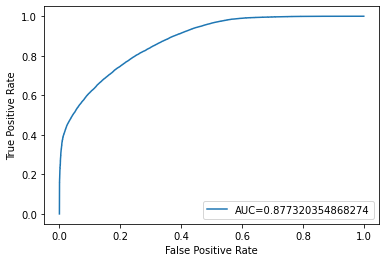

In [44]:
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Plot counts of predicted probabilities:

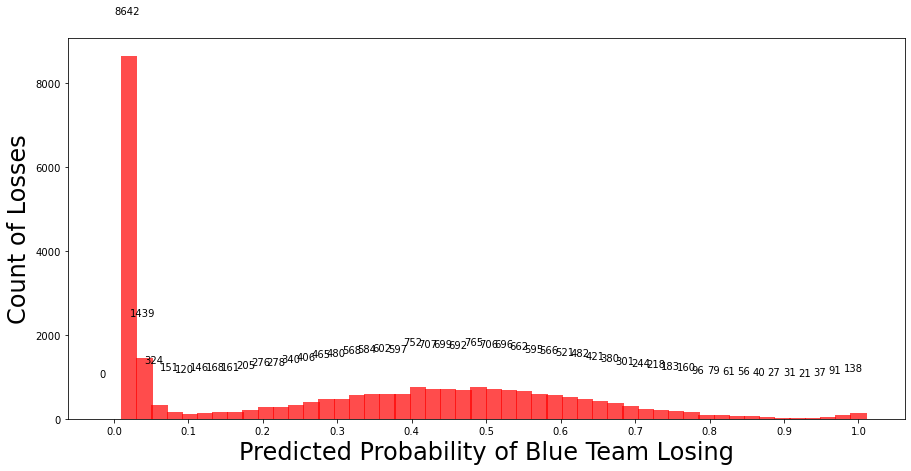

In [45]:
plt.figure(figsize=(15,7))
plt.bar(bins, counts1, width=0.022, bottom=None, align='center', color='r', alpha=0.7)
plt.xlabel('Predicted Probability of Blue Team Losing', fontsize=24)
plt.ylabel('Count of Losses', fontsize=24)
plt.xticks(np.linspace(0,1,11))
# for p in ax.patches:
#     ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
for i, v in enumerate(counts1):
    plt.text(bins[i] - 0.02, v + 1000, str(v))
plt.show()

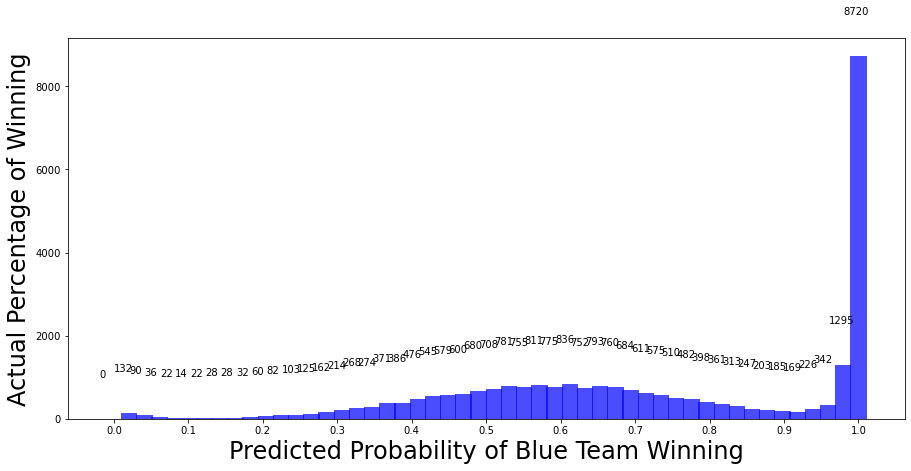

In [46]:
plt.figure(figsize=(15,7))
plt.bar(bins, counts2, width=0.022, bottom=None, align='center', color='b', alpha=0.7)
plt.xlabel('Predicted Probability of Blue Team Winning', fontsize=24)
plt.ylabel('Actual Percentage of Winning', fontsize=24)
plt.xticks(np.linspace(0,1,11))

for i, v in enumerate(counts2):
    plt.text(bins[i] - 0.02, v + 1000, str(v))
plt.show()
plt.show()

Plot predicted probability vs Ground Truths:

posx and posy should be finite values
posx and posy should be finite values


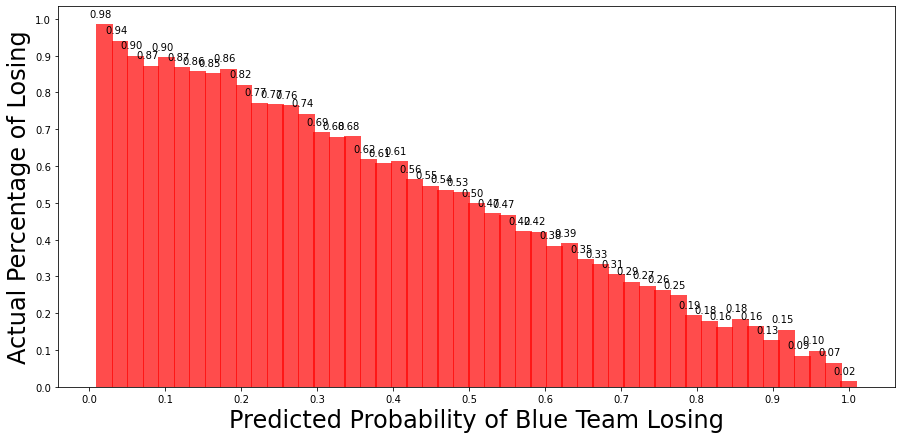

In [47]:
plt.figure(figsize=(15,7))
plt.bar(bins, prob_dist1, width=0.022, bottom=None, align='center', color='r', alpha=0.7)
plt.xlabel('Predicted Probability of Blue Team Losing', fontsize=24)
plt.ylabel('Actual Percentage of Losing', fontsize=24)
plt.xticks(np.linspace(0,1,11))
plt.yticks(np.linspace(0,1,11))
for i, v in enumerate(prob_dist1):
    plt.text(bins[i] - 0.02, v+0.02, str(f'{v:0.2f}'))
plt.show()

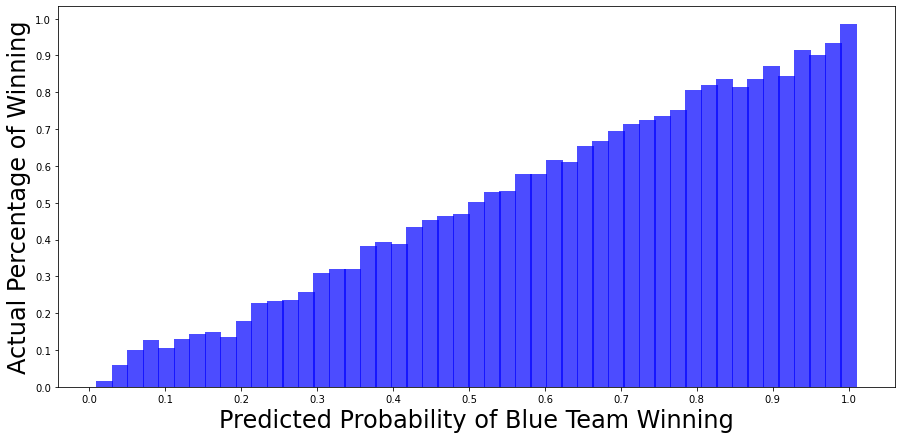

In [48]:
plt.figure(figsize=(15,7))
plt.bar(bins, prob_dist2, width=0.022, bottom=None, align='center', color='b', alpha=0.7)
plt.xlabel('Predicted Probability of Blue Team Winning', fontsize=24)
plt.ylabel('Actual Percentage of Winning', fontsize=24)
plt.xticks(np.linspace(0,1,11))
plt.yticks(np.linspace(0,1,11))
plt.show()

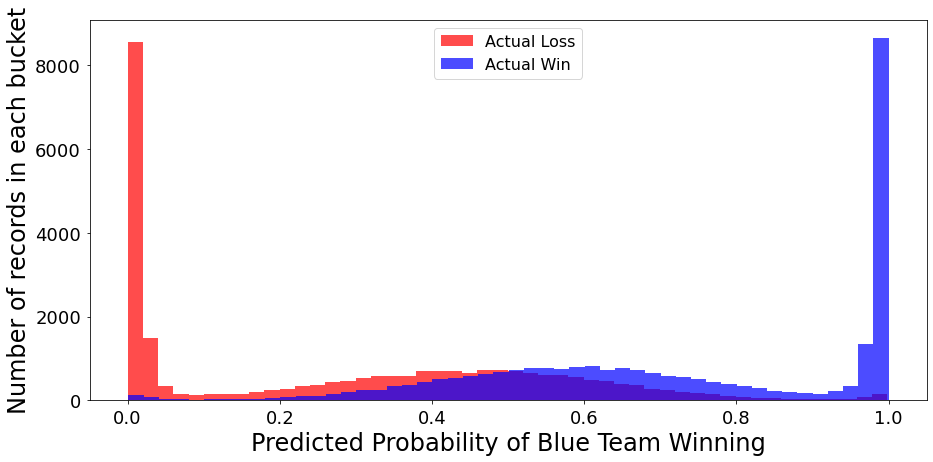

In [49]:
plt.figure(figsize=(15,7))
plt.hist(y_prob[y_test==0][:,1], bins=50, label='Actual Loss', alpha=0.7, color='r')
plt.hist(y_prob[y_test==1][:,1], bins=50, label='Actual Win', alpha=0.7, color='b')
plt.xlabel('Predicted Probability of Blue Team Winning', fontsize=24)
plt.ylabel('Number of records in each bucket', fontsize=24)
plt.legend(fontsize=16)
plt.tick_params(axis='both', labelsize=18, pad=5)
plt.show()

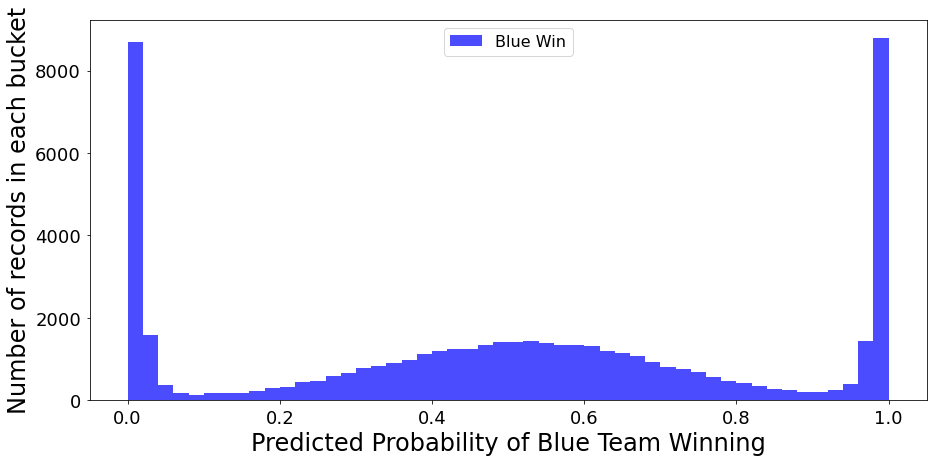

In [50]:
plt.figure(figsize=(15,7))
plt.hist(y_prob[:,1], bins=50, label='Blue Win', alpha=0.7, color='b')
plt.xlabel('Predicted Probability of Blue Team Winning', fontsize=24)
plt.ylabel('Number of records in each bucket', fontsize=24)
plt.legend(fontsize=16)
plt.tick_params(axis='both', labelsize=18, pad=5)
plt.show() 

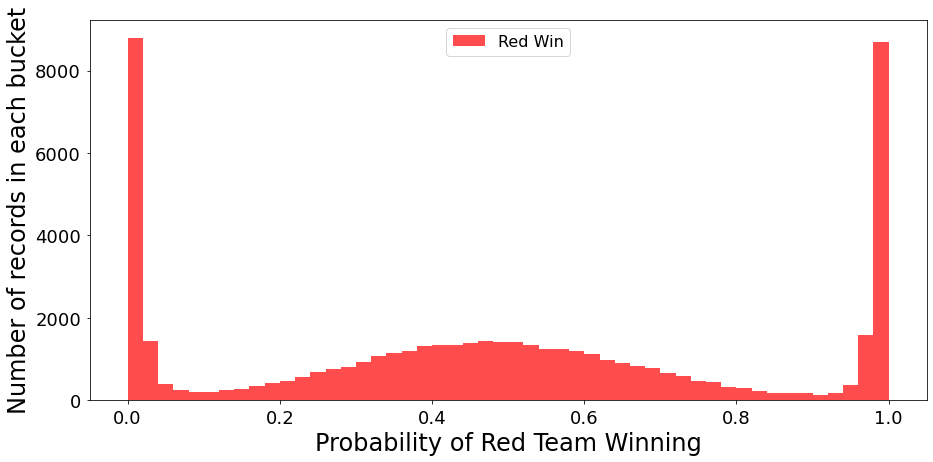

In [51]:
plt.figure(figsize=(15,7))
plt.hist(y_prob[:,0], bins=50, label='Red Win', alpha=0.7, color='r')
plt.xlabel('Probability of Red Team Winning', fontsize=24)
plt.ylabel('Number of records in each bucket', fontsize=24)
plt.legend(fontsize=16)
plt.tick_params(axis='both', labelsize=18, pad=5)
plt.show() 

### Evaluate feature importance

In [54]:
feature_score = pd.DataFrame(list(zip(X.dtypes.index, cbc.get_feature_importance(Pool(X, label=y, cat_features=categorical_features_indices)))),
                columns=['Feature','Score'])
feature_score = feature_score.sort_values(by='Score', ascending=False, inplace=False, kind='quicksort', na_position='last')

In [55]:
feature_score.head(60)

,Feature,Score
44,champPts_5,8.173647
49,champPts_10,8.026945
43,champPts_4,7.317384
40,champPts_1,6.775688
41,champPts_2,6.625624
48,champPts_9,6.585541
47,champPts_8,6.536735
42,champPts_3,6.481253
46,champPts_7,6.131068
45,champPts_6,5.912315


In [56]:
feature_score.tail(50)

,Feature,Score
24,rankWins_5,0.103078
156,secondaryClass_9,0.101241
81,perk1_2,0.099455
150,secondaryClass_7,0.097431
88,perk1_9,0.096554
86,perk1_7,0.096503
37,rankLosses_8,0.096008
11,rank_2,0.095667
26,rankWins_7,0.095458
87,perk1_8,0.095388


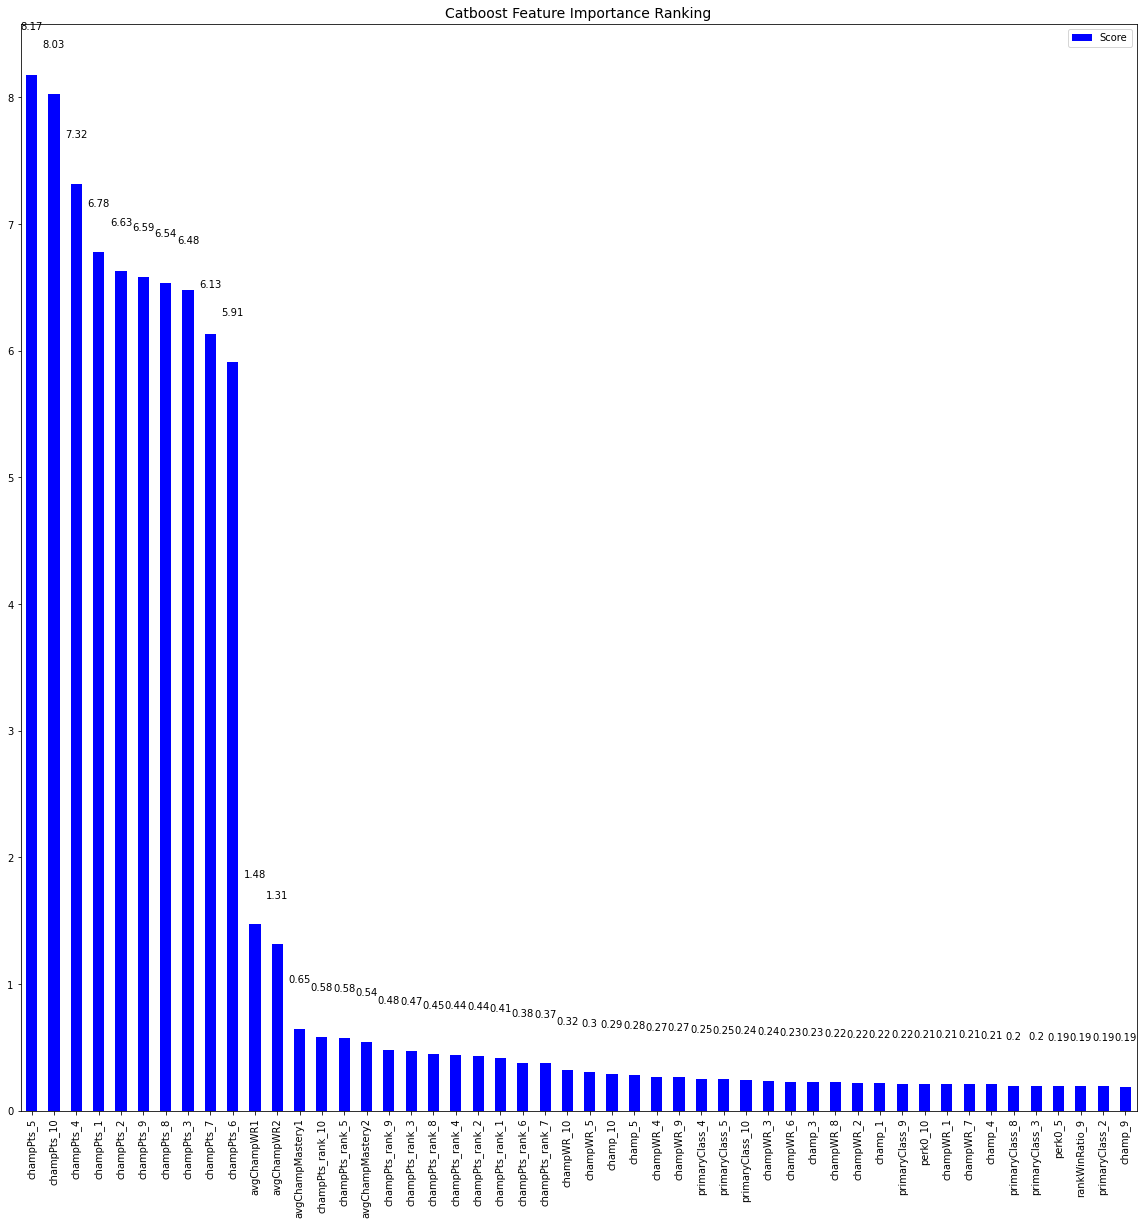

In [57]:
plt.rcParams["figure.figsize"] = (20,20)
ax = feature_score.head(50).plot('Feature', 'Score', kind='bar', color='b')
ax.set_title("Catboost Feature Importance Ranking", fontsize = 14)
ax.set_xlabel('')

rects = ax.patches

labels = feature_score['Score'].round(2)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.35, label, ha='center', va='bottom')

plt.show()